# Тестирование класса ConvexPolyhedron

Этот ноутбук предназначен для тестирования класса `ConvexPolyhedron`, который строит выпуклый многогранник из плоскостей и их пересечений.


In [1]:
import numpy as np
import sys
import os
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Add stlgen to path
current_dir = Path.cwd()
stlgen_dir = current_dir.parent
sys.path.insert(0, str(stlgen_dir))

# Import ConvexPolyhedron
from geometry.convex_polyhedron import ConvexPolyhedron

print("✓ Модули успешно импортированы")


✓ Модули успешно импортированы


## Тест 1: Простой куб из 6 плоскостей

Создаем куб размером 10x10x10 из 6 плоскостей (грани куба) и 8 вершин.


In [2]:
# Тест 1: Куб 10x10x10

# Размер куба
size = 10.0

# 6 плоскостей (грани куба)
# Для каждой плоскости: точка на плоскости и нормаль
plane_points = [
    np.array([size/2, 0, 0]),        # 0: правая грань (нормаль +x)
    np.array([-size/2, 0, 0]),       # 1: левая грань (нормаль -x)
    np.array([0, size/2, 0]),        # 2: передняя грань (нормаль +y)
    np.array([0, -size/2, 0]),       # 3: задняя грань (нормаль -y)
    np.array([0, 0, size/2]),        # 4: верхняя грань (нормаль +z)
    np.array([0, 0, -size/2]),       # 5: нижняя грань (нормаль -z)
]

plane_normals = [
    np.array([1, 0, 0]),             # 0: нормаль вправо
    np.array([-1, 0, 0]),            # 1: нормаль влево
    np.array([0, 1, 0]),             # 2: нормаль вперед
    np.array([0, -1, 0]),            # 3: нормаль назад
    np.array([0, 0, 1]),             # 4: нормаль вверх
    np.array([0, 0, -1]),            # 5: нормаль вниз
]

# 8 вершин куба (каждая вершина - пересечение 3 граней)
vertex_triplets = [
    (0, 2, 4),  # Вершина: правая + передняя + верхняя
    (0, 2, 5),  # Вершина: правая + передняя + нижняя
    (0, 3, 4),  # Вершина: правая + задняя + верхняя
    (0, 3, 5),  # Вершина: правая + задняя + нижняя
    (1, 2, 4),  # Вершина: левая + передняя + верхняя
    (1, 2, 5),  # Вершина: левая + передняя + нижняя
    (1, 3, 4),  # Вершина: левая + задняя + верхняя
    (1, 3, 5),  # Вершина: левая + задняя + нижняя
]

# Создаем полиэдр
cube = ConvexPolyhedron(
    plane_points=plane_points,
    plane_normals=plane_normals,
    vertex_triplets=vertex_triplets,
    tolerance=1e-5
)

print(f"Создан полиэдр: {cube}")
print(f"Плоскостей: {len(plane_points)}")
print(f"Троек вершин: {len(vertex_triplets)}")


Создан полиэдр: ConvexPolyhedron(planes=6, vertices=0, faces=0)
Плоскостей: 6
Троек вершин: 8


In [3]:
# Вычисляем вершины
vertices = cube.build_vertices()
print(f"\n✓ Вершины вычислены: {len(vertices)} вершин")
print(f"\nВершины куба:")
for i, v in enumerate(vertices):
    print(f"  [{i}]: ({v[0]:.2f}, {v[1]:.2f}, {v[2]:.2f})")



✓ Вершины вычислены: 8 вершин

Вершины куба:
  [0]: (5.00, 5.00, 5.00)
  [1]: (5.00, 5.00, -5.00)
  [2]: (5.00, -5.00, 5.00)
  [3]: (5.00, -5.00, -5.00)
  [4]: (-5.00, 5.00, 5.00)
  [5]: (-5.00, 5.00, -5.00)
  [6]: (-5.00, -5.00, 5.00)
  [7]: (-5.00, -5.00, -5.00)


In [4]:
# Строим выпуклую оболочку
faces = cube.build_convex_hull()
print(f"\n✓ Convex hull построен: {len(faces)} треугольных граней")
print(f"\nПервые 3 грани:")
for i, face in enumerate(faces[:3]):
    print(f"  Грань {i+1}:")
    for j, vertex in enumerate(face):
        print(f"    Вершина {j+1}: ({vertex[0]:.2f}, {vertex[1]:.2f}, {vertex[2]:.2f})")



✓ Convex hull построен: 12 треугольных граней

Первые 3 грани:
  Грань 1:
    Вершина 1: (-5.00, -5.00, 5.00)
    Вершина 2: (5.00, -5.00, 5.00)
    Вершина 3: (5.00, 5.00, 5.00)
  Грань 2:
    Вершина 1: (-5.00, -5.00, 5.00)
    Вершина 2: (5.00, 5.00, 5.00)
    Вершина 3: (-5.00, 5.00, 5.00)
  Грань 3:
    Вершина 1: (-5.00, 5.00, -5.00)
    Вершина 2: (5.00, 5.00, 5.00)
    Вершина 3: (-5.00, 5.00, 5.00)


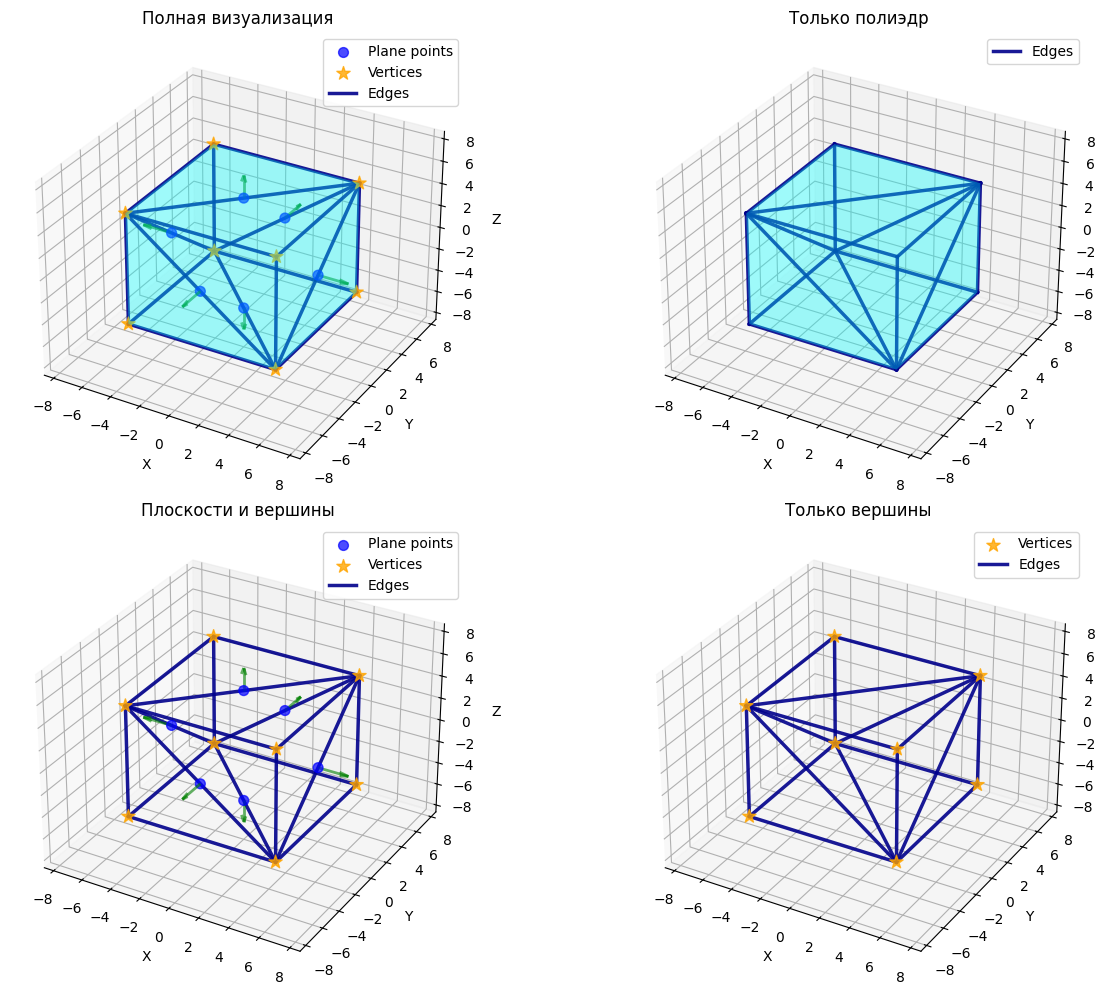

In [5]:
# Визуализация куба
fig = plt.figure(figsize=(14, 10))

# Визуализация 1: Полная (все элементы)
ax1 = fig.add_subplot(221, projection='3d')
cube.visualize(
    ax=ax1, 
    show_planes=True, 
    show_vertices=True, 
    show_polyhedron=True,
    scale_normal=2.0
)
ax1.set_title('Полная визуализация')

# Визуализация 2: Только полиэдр
ax2 = fig.add_subplot(222, projection='3d')
cube.visualize(
    ax=ax2, 
    show_planes=False, 
    show_vertices=False, 
    show_polyhedron=True
)
ax2.set_title('Только полиэдр')

# Визуализация 3: Плоскости и вершины
ax3 = fig.add_subplot(223, projection='3d')
cube.visualize(
    ax=ax3, 
    show_planes=True, 
    show_vertices=True, 
    show_polyhedron=False,
    scale_normal=2.0
)
ax3.set_title('Плоскости и вершины')

# Визуализация 4: Только вершины
ax4 = fig.add_subplot(224, projection='3d')
cube.visualize(
    ax=ax4, 
    show_planes=False, 
    show_vertices=True, 
    show_polyhedron=False
)
ax4.set_title('Только вершины')

plt.tight_layout()
plt.show()


In [6]:
# Экспорт в STL
print("Экспорт куба в STL...")
cube.to_stl("test_cube.stl", solid_name="test_cube", format="ascii")
print("✓ STL файл создан: test_cube.stl")

# Проверяем размер файла
import os
if os.path.exists("test_cube.stl"):
    size = os.path.getsize("test_cube.stl")
    print(f"  Размер файла: {size} байт")


Экспорт куба в STL...
ASCII-STL written: test_cube.stl
  • Unique vertices: 8
  • Triangles: 12
✓ STL файл создан: test_cube.stl
  Размер файла: 3504 байт


## Тест 2: Более сложный многогранник - тетраэдр

Создаем тетраэдр из 4 плоскостей.


In [7]:
# Тест 2: Тетраэдр

# Вершины тетраэдра
a = np.array([0, 0, 0])
b = np.array([10, 0, 0])
c = np.array([5, 8.66, 0])  # высота правильного треугольника
d = np.array([5, 2.89, 8.16])  # высота тетраэдра

# 4 плоскости тетраэдра (каждая грань - плоскость)
plane_points_tet = [a, b, c, d]
plane_normals_tet = [
    np.array([0, 0, -1]),   # 0: плоскость ABC (нижняя)
    np.cross(b - a, d - a),  # 1: плоскость ABD
    np.cross(c - b, d - b),  # 2: плоскость BCD
    np.cross(a - c, d - c),  # 3: плоскость ACD
]

# Нормализуем нормали
for i in range(len(plane_normals_tet)):
    norm = np.linalg.norm(plane_normals_tet[i])
    if norm > 0:
        plane_normals_tet[i] = plane_normals_tet[i] / norm

# 4 вершины тетраэдра (пересечение 3 плоскостей)
vertex_triplets_tet = [
    (0, 1, 2),  # Точка пересечения плоскостей ABC, ABD, BCD
    (0, 1, 3),  # Точка пересечения плоскостей ABC, ABD, ACD
    (0, 2, 3),  # Точка пересечения плоскостей ABC, BCD, ACD
    (1, 2, 3),  # Точка пересечения плоскостей ABD, BCD, ACD
]

tetrahedron = ConvexPolyhedron(
    plane_points=plane_points_tet,
    plane_normals=plane_normals_tet,
    vertex_triplets=vertex_triplets_tet
)

print(f"Создан тетраэдр: {tetrahedron}")
vertices_tet = tetrahedron.build_vertices()
print(f"Вершины: {len(vertices_tet)}")
faces_tet = tetrahedron.build_convex_hull()
print(f"Грани: {len(faces_tet)}")


Создан тетраэдр: ConvexPolyhedron(planes=4, vertices=0, faces=0)
Вершины: 4
Грани: 4


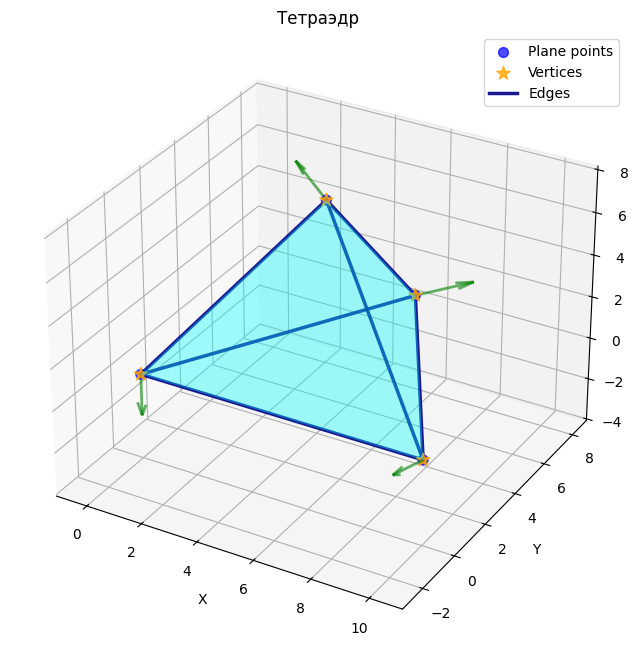

ASCII-STL written: test_tetrahedron.stl
  • Unique vertices: 4
  • Triangles: 4
✓ STL файл создан: test_tetrahedron.stl


In [8]:
# Визуализация тетраэдра
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
tetrahedron.visualize(
    ax=ax, 
    show_planes=True, 
    show_vertices=True, 
    show_polyhedron=True,
    scale_normal=2.0
)
ax.set_title('Тетраэдр')
plt.show()

# Экспорт
tetrahedron.to_stl("test_tetrahedron.stl", solid_name="tetrahedron", format="ascii")
print("✓ STL файл создан: test_tetrahedron.stl")


## Тест 3: Валидация - проверка на вырожденных случаях


In [9]:
# Тест 3: Проверка валидации

# Тест: параллельные плоскости (не должны пересекаться)
print("=== Тест: Параллельные плоскости ===")
try:
    plane_points_test = [
        np.array([0, 0, 0]),
        np.array([0, 0, 5]),
        np.array([0, 0, 10]),
    ]
    plane_normals_test = [
        np.array([1, 0, 0]),
        np.array([1, 0, 0]),  # Параллельная
        np.array([1, 0, 0]),  # Параллельная
    ]
    vertex_triplets_test = [
        (0, 1, 2),  # Все параллельны - не должны пересекаться
    ]
    
    test_poly = ConvexPolyhedron(
        plane_points=plane_points_test,
        plane_normals=plane_normals_test,
        vertex_triplets=vertex_triplets_test
    )
    vertices_test = test_poly.build_vertices()
    print(f"  Вершины: {len(vertices_test)}")
except Exception as e:
    print(f"  ✓ Ожидаемая ошибка: {type(e).__name__}")

# Тест: недостаточно вершин для convex hull
print("\n=== Тест: Недостаточно вершин ===")
try:
    plane_points_min = [
        np.array([0, 0, 0]),
        np.array([1, 0, 0]),
        np.array([0, 1, 0]),
        np.array([0, 0, 1]),
    ]
    plane_normals_min = [
        np.array([1, 0, 0]),
        np.array([-1, 0, 0]),
        np.array([0, 1, 0]),
        np.array([0, 0, 1]),
    ]
    vertex_triplets_min = [
        (0, 1, 2),  # Только одна вершина
    ]
    
    test_poly2 = ConvexPolyhedron(
        plane_points=plane_points_min,
        plane_normals=plane_normals_min,
        vertex_triplets=vertex_triplets_min
    )
    vertices_min = test_poly2.build_vertices()
    print(f"  Вершины: {len(vertices_min)}")
    faces_min = test_poly2.build_convex_hull()
    print(f"  Грани: {len(faces_min)}")
except Exception as e:
    print(f"  ✓ Ожидаемая ошибка: {type(e).__name__}")


=== Тест: Параллельные плоскости ===
  ✓ Ожидаемая ошибка: ValueError

=== Тест: Недостаточно вершин ===
  ✓ Ожидаемая ошибка: ValueError


## Тест 4: STL экспорт - проверка форматов


In [10]:
# Тест 4: Экспорт в разных форматах

print("=== Экспорт куба в разных форматах ===")

# ASCII формат
cube.to_stl("cube_ascii.stl", solid_name="cube_ascii", format="ascii")
print("✓ ASCII STL создан: cube_ascii.stl")

# Binary формат
cube.to_stl("cube_binary.stl", solid_name="cube_binary", format="binary")
print("✓ Binary STL создан: cube_binary.stl")

# Проверяем размеры файлов
import os
if os.path.exists("cube_ascii.stl"):
    size_ascii = os.path.getsize("cube_ascii.stl")
    print(f"  ASCII размер: {size_ascii} байт")
if os.path.exists("cube_binary.stl"):
    size_binary = os.path.getsize("cube_binary.stl")
    print(f"  Binary размер: {size_binary} байт")
    print(f"  Binary меньше в {size_ascii/size_binary:.1f} раз")


=== Экспорт куба в разных форматах ===
ASCII-STL written: cube_ascii.stl
  • Unique vertices: 8
  • Triangles: 12
✓ ASCII STL создан: cube_ascii.stl


TypeError: STLExporter.write_binary_stl() takes 3 positional arguments but 4 were given

## Резюме тестирования

Проверено:
- ✅ Построение вершин из троек плоскостей
- ✅ Валидация пересечений
- ✅ Построение выпуклой оболочки
- ✅ Визуализация в 3D (плоскости, нормали, вершины, полиэдр)
- ✅ Экспорт в STL (ASCII и binary)
- ✅ Обработка вырожденных случаев
